In [2]:
import numpy as np

### Embedding

The input of a decoder or encoder has an integer index assigned to each of the items in the list, (in this case each word of a sentence).
- Embedding allows for the conversion of categorical data into vectors with continuous (floating point) numbers.
- With training, related items would have similar vectors.
- In "Attention is All You Need", "positional encodings" are added to the input embeddings. The positional encodings have the same dimension "d" as the embeddings, so that the two can be summed.  Due to its sinusoidal nature, any linear offset will allow it to be represented as a function of the original trigonometic equation, ( e.g. given S = sin(a), C = cos(a):   sin(a + b) = sin(a)cos(b) + cos(a)sin(b) = S cos(b) + C sin(b) ).
- In terms of a sequence of words representing an input, the embedding helps to provide that word with an identity, while the positional encoding helps to explain the position of that word in the sentence.

### Attention

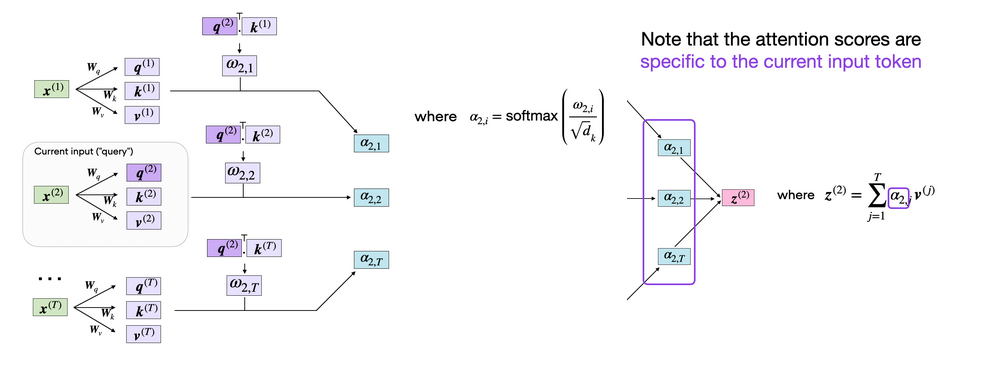

The weight matricies are parameters that are adjusted during training.  The rows of the matrix are the same length as the embedding size of the input vectors so that the size of the Query (Q), Key (K), and Value (V) matrices have the same number of tokens as the input after multiplication.  In other words, the input encodings for each token are now projected into components of the Q, K, V matricies.  It is important to keep each token's Q and K matrix inputs as vectors in order to calculate their relationship with each other using the dot product.

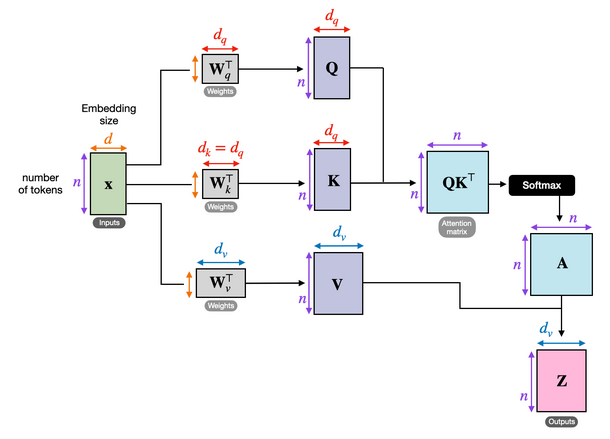

In the example below, the rows of matrix A go from 0 to "n" and the columns from 0 to "m".  Matrix V has "m" rows and "dv" columns.  In the above figure, n = m.
Each element of the softmax matrix takes the dot product between q and k, (q being a weighted query vector with length dq projected from an input token vector, aligned with a weighted key vector with length dk projected from its own token vector).  The purpose is to find how colinear the two vectors are.  The greater the linear independence vector q(j) has from vector k(i), the closer the pair is to 0.
At query token j (row j), with key token i (column i), the element p(j, i) would then contain the matrix multiplication: [j:dq]x[dk:i] = [j, i], with dk = dq.

The sum of each row from the softmax funciton gives a normalized probability distribution which adds to one.  Rescaling by sqrt(dk) allows for the variance to be minimized to prevent a single word from dominating the softmax function by pushing the function into regions will small gradients.  The vectors in the value matrix at position i have a length of dv.  

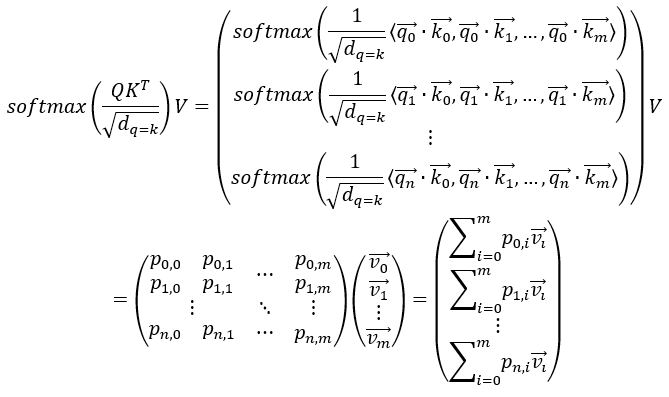

The columns of the softmax matrix are the same dimention as the rows of value matrix "V", which gives a series of weighted averages of the rows of V.  [n:m] x [m:dv] = [n:dv], here n equals the number of tokens.
Think of the "p" elements along the attention matrix columns as components of a normalized histogram with a probability distribution based on how well the qk vector pairs for each token are linearly dependent.  

The attention multiplied by the value matrix can be thought of finding the expectation value of v for each token given the softmax distribution calculated.  The effect of this is to determine which token vector with value weights in matrix V should be emphasized in the vectors of matrix Z.  

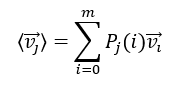

P in this case is the probability distribution for row j along the input tokens (attention matrix).  In this case the function will magnify a vector v with length dv in matrix V, (rows i from 0 to n in the value matrix), where P is greatest.

Probabilities in the attention matrix emphasizing certian positions where q and k are the most linearly dependent, (inputs with the greatest correlation), will magnify certain vectors in V such that the order of the context vectors of Z will bring attention to specific input vectors of X.

### Feedforward Neural Network

A feedforward neural network is unidirectional and information within the network only travels forward along the nodes.

A Rectified Linear Unit, (ReLU), is a function defined as:

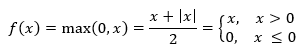

where x is an input to a neuron.  It is non-linear in the sense that any input that is negative which ReLU operates on will then have a value of 0.  The values are normalized to find a relative representation of the importance score.  The purpose of the ReLU is to prevent negative numbers in the denominator during normalization to not divide by 0.

### Cross-Attention

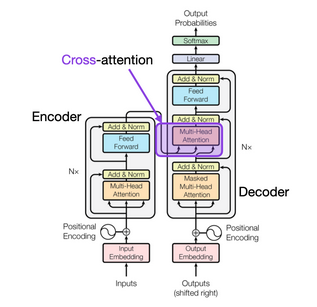

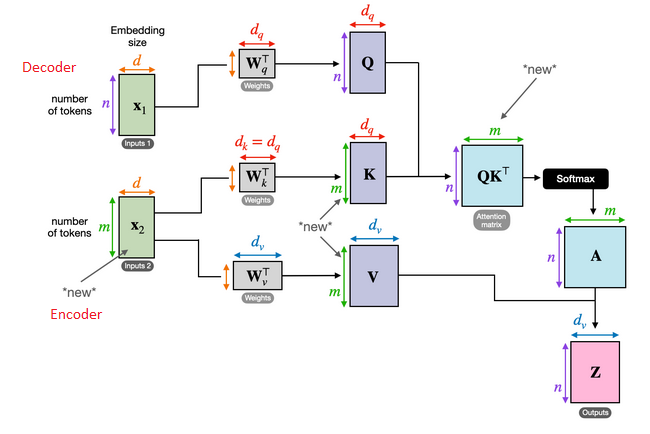

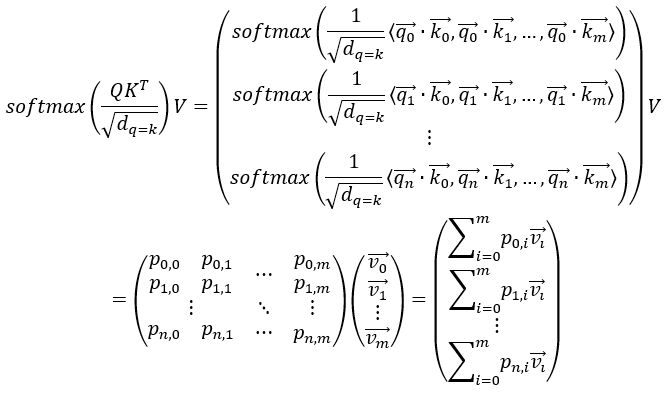

In the figures above, the value and keys come from the encoder and the total number of tokens are from 0 to "m".  The query comes from the decoder, with a total number of tokens from 0 to "n".  The dq and dk embedding dimensions still need to match to compute the dot product between the two values.

Just like in self-attention, probabilities in the attention matrix emphasizing certian positions where q and k are the most linearly dependent, (inputs with the greatest correlation), will magnify certain vectors in V.  However with cross-attention, the context vectors of Z will have the same number of tokens as the input from the decoder and not the encoder.  Attention is given to a vector of the encoder value matrix V, where higher values between a query from a decoder vector to the key from an encoder vector emphasize more important pieces of context of the encoder input vectors.  

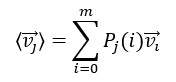 Here the attention probability distribution for row j of the A matrix will emphasize important pieces of context of the encoder value vectors from V to give the output vectors.  Vectors from Z will bring attention to certain value vectors of the encoder, (the inputs from X2 go from 0 to "m").  

The encoder and decoder vectors are weighted in cross-attention so that encoded output vectors in matrix Z will help to give a better representation of the next target vector instead of the input vector itself, (the A matrix emphasizing certain V matrix vectors from the encoder will help the decoder focus on the most appropriate location in the encoder input sequence).

### References

- [1] Ashish Vaswani, Noam Shazeer, Niki Parmar, Jakob Uszkoreit, Llion Jones, Aidan N. Gomez, Lukasz Kaiser, Illia Polosukhin. “Attention is All You Need”. https://proceedings.neurips.cc/paper_files/paper/2017/file/3f5ee243547dee91fbd053c1c4a845aa-Paper.pdf
- [2]	Sebastian Raschka. Understanding and Coding the Self-Attention Mechanism of Large Language Models From Scratch. https://sebastianraschka.com/blog/2023/self-attention-from-scratch.html
- [3]	Dan B. Rectified Linear Units (ReLU) in Deep Learning. https://www.kaggle.com/code/dansbecker/rectified-linear-units-relu-in-deep-learning
- [4] Robert Kwiatkowski.  Gradient Descent Algorithm – a deep dive. https://towardsdatascience.com/gradient-descent-algorithm-a-deep-dive-cf04e8115f21
- [5] Gabe. Encoder-Decoder Models and Transformers. https://medium.com/@gabell/encoder-decoder-models-and-transformers-5c1500c22c22
- [6] Jonas Gehring, Michael Auli, David Grangier, Denis Yarats, Yann N. Dauphin. Convolutional Sequence to Sequence Learning. Facebook AI Research (2017)
